In [2]:
# Fellipe de Oliveira Silva - 2711
# Nathan Carlos de Freitas - 3917

import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from skimage import transform, measure, util, filters, color
from sklearn import model_selection, neighbors, metrics, preprocessing

np.random.seed(393)

In [3]:
#Caminho para a pasta de treino:
ds_path = 'C:/Users/felli/Downloads/mpeg7_4classes_aug_x8_work/Train'
#Caminho para a pasta de teste:
ds_path_test = 'C:/Users/felli/Downloads/mpeg7_4classes_aug_x8_work/Test'

classes_list = os.listdir(ds_path)
classes_list_test = os.listdir(ds_path_test)

In [4]:
#Preparando o dataset adicionando as imagens e os rotúlos em suas respectivas listas para ambas as pastas (teste e treino)
image_list = []
label_list = []


for classe in classes_list:
    filename_list = os.listdir(os.path.join(ds_path, classe))
    for filename in filename_list:
        img_temp = plt.imread(os.path.join(ds_path, classe, filename))
        image_list.append(img_temp)
        label_list.append(classe)
        


In [5]:
_, _, label_list_idx = np.unique(label_list, return_index=True, return_inverse=True)

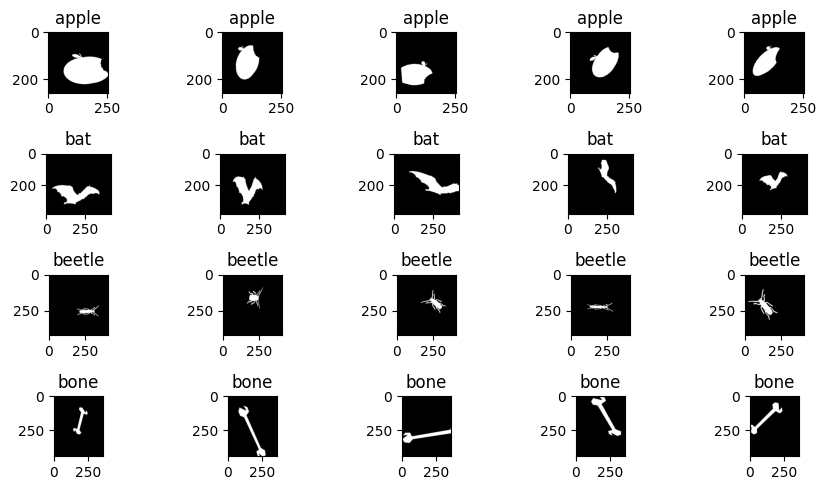

In [6]:
image_list_temp = []
label_list_temp = []
for i in range(4):
    image_list_temp += [image_list[j] for j in np.where(label_list_idx==i)[0][121:126]]
    label_list_temp += [label_list[j] for j in np.where(label_list_idx==i)[0][121:126]]

    
#Visualizando algumas imagens do conjunto de treino.
fig, ax  = plt.subplots(4, 5, figsize=(9, 5))

for i, (image, label) in enumerate(zip(image_list_temp, label_list_temp)):
    ax[i//5, i%5].imshow(image, vmin=0, vmax=255)
    ax[i//5, i%5].set_title(str(label))

fig.tight_layout()
plt.show()

In [7]:
features = ['area', 'major_axis', 'minor_axis', 'solidity']


feature_mat = []
seg_list = []

for i, (image, label) in enumerate(zip(image_list, label_list)):
    print('Imagem {} - classe {}'.format(i, label))
    im_lbl = measure.label(image)
    props = measure.regionprops(im_lbl)
    for prop in props:
        area = prop.area
        major_axis = prop.major_axis_length
        minor_axis = prop.minor_axis_length
        solidity = prop.solidity
        feature_list = [area, major_axis, minor_axis, solidity]
    feature_mat.append(feature_list)



Imagem 0 - classe apple
Imagem 1 - classe apple
Imagem 2 - classe apple
Imagem 3 - classe apple
Imagem 4 - classe apple
Imagem 5 - classe apple
Imagem 6 - classe apple
Imagem 7 - classe apple
Imagem 8 - classe apple
Imagem 9 - classe apple
Imagem 10 - classe apple
Imagem 11 - classe apple
Imagem 12 - classe apple
Imagem 13 - classe apple
Imagem 14 - classe apple
Imagem 15 - classe apple
Imagem 16 - classe apple
Imagem 17 - classe apple
Imagem 18 - classe apple
Imagem 19 - classe apple
Imagem 20 - classe apple
Imagem 21 - classe apple
Imagem 22 - classe apple
Imagem 23 - classe apple
Imagem 24 - classe apple
Imagem 25 - classe apple
Imagem 26 - classe apple
Imagem 27 - classe apple
Imagem 28 - classe apple
Imagem 29 - classe apple
Imagem 30 - classe apple
Imagem 31 - classe apple
Imagem 32 - classe apple
Imagem 33 - classe apple
Imagem 34 - classe apple
Imagem 35 - classe apple
Imagem 36 - classe apple
Imagem 37 - classe apple
Imagem 38 - classe apple
Imagem 39 - classe apple
Imagem 40 

Imagem 328 - classe beetle
Imagem 329 - classe beetle
Imagem 330 - classe beetle
Imagem 331 - classe beetle
Imagem 332 - classe beetle
Imagem 333 - classe beetle
Imagem 334 - classe beetle
Imagem 335 - classe beetle
Imagem 336 - classe beetle
Imagem 337 - classe beetle
Imagem 338 - classe beetle
Imagem 339 - classe beetle
Imagem 340 - classe beetle
Imagem 341 - classe beetle
Imagem 342 - classe beetle
Imagem 343 - classe beetle
Imagem 344 - classe beetle
Imagem 345 - classe beetle
Imagem 346 - classe beetle
Imagem 347 - classe beetle
Imagem 348 - classe beetle
Imagem 349 - classe beetle
Imagem 350 - classe beetle
Imagem 351 - classe beetle
Imagem 352 - classe beetle
Imagem 353 - classe beetle
Imagem 354 - classe beetle
Imagem 355 - classe beetle
Imagem 356 - classe beetle
Imagem 357 - classe beetle
Imagem 358 - classe beetle
Imagem 359 - classe beetle
Imagem 360 - classe beetle
Imagem 361 - classe beetle
Imagem 362 - classe beetle
Imagem 363 - classe beetle
Imagem 364 - classe beetle
I

In [8]:
feature_map = np.array(feature_mat)

In [9]:
feature_map_norm = (feature_map - feature_map.mean(0)) / feature_map.std(0)

In [10]:
df_norm = pd.DataFrame(feature_map_norm, columns=features)
df_norm['class'] = label_list

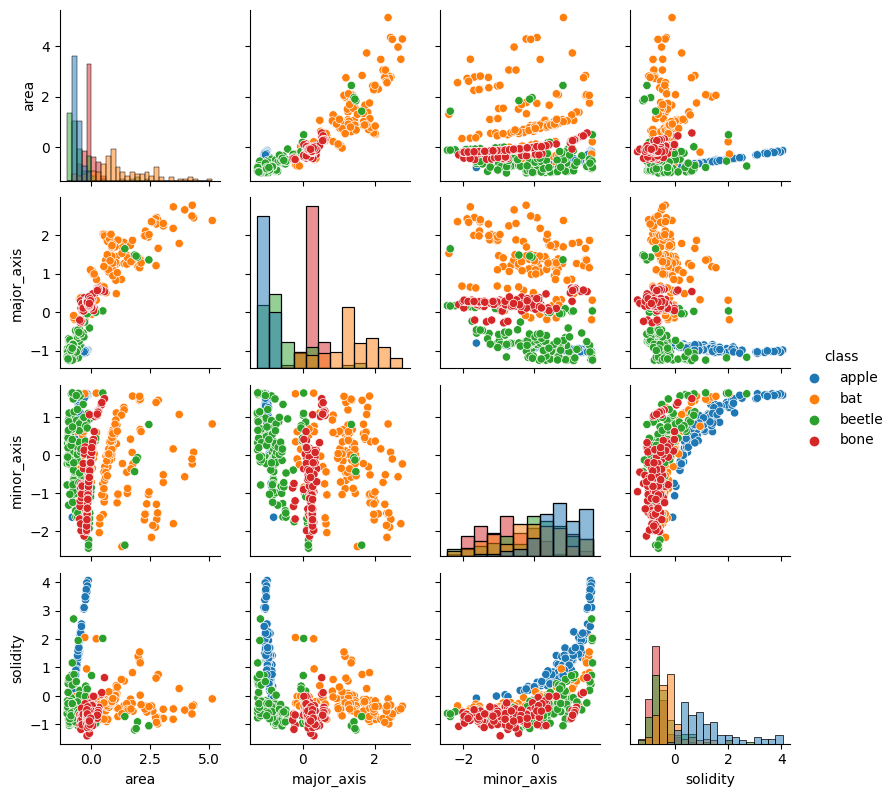

In [11]:
g = sns.PairGrid(df_norm, hue='class', vars=features)
g.fig.set_size_inches(8, 8)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

In [12]:
feature_map_ok = feature_map[:,1::2]
X_train, X_val, y_train, y_val = model_selection.train_test_split(feature_map_ok, 
                                                                    label_list, 
                                                                    test_size=0.3, 
                                                                    random_state=393)

In [13]:
scaler = preprocessing.StandardScaler().fit(X_train)
with np.printoptions(precision=4, suppress=True):
    print(f'Média:  \t {np.array(scaler.mean_)}')
    print(f'Desv. pad.: \t {np.array(scaler.scale_)}')


Média:  	 [502.0901   0.4952]
Desv. pad.: 	 [206.0151   0.0653]


In [14]:
X_train_norm = scaler.transform(X_train)
X_val_norm = scaler.transform(X_val)

In [15]:
#Determinando o melhor K
k_list = [1, 2, 3, 4, 5, 6, 7, 8, 9]
acc_train_list = []
acc_val_list = []
for k_ in k_list:
    clf = neighbors.KNeighborsClassifier(n_neighbors=k_)
    clf.fit(X_train_norm, y_train)
    pred = clf.predict(X_val_norm)
    acc_val = metrics.accuracy_score(y_val, pred)
    
    acc_val_list.append(acc_val)
    pred_train = clf.predict(X_train_norm)
    acc_train = metrics.accuracy_score(y_train, pred_train)
    
    acc_train_list.append(acc_train)

In [16]:
for k_, acc_t, acc_v in zip(k_list, acc_train_list, acc_val_list):
    print(f'{k_} \t {acc_t:.4f} \t {acc_v:.4f}')

k_best = k_list[np.argmax(acc_val_list)]
print(f'Melhor \'k\': {k_best} ({np.max(acc_val_list):.4f} acc.)')

1 	 1.0000 	 0.9276
2 	 0.9347 	 0.9013
3 	 0.9347 	 0.9145
4 	 0.9261 	 0.9079
5 	 0.9176 	 0.8947
6 	 0.9062 	 0.9013
7 	 0.9119 	 0.8882
8 	 0.9006 	 0.8750
9 	 0.8977 	 0.8882
Melhor 'k': 1 (0.9276 acc.)


In [17]:
#Treinando e executando sobre o split de validação
clf = neighbors.KNeighborsClassifier(n_neighbors=k_best)
clf.fit(X_train_norm, y_train)
pred = clf.predict(X_val_norm)
acc_val = metrics.accuracy_score(y_val, pred)

In [18]:
#Matriz de confusão e relatório de classificação referente ao conjunto de validação
print('Matriz de confusão:')
print(metrics.confusion_matrix(y_val, pred))

print('\nRelatório de classificação:')
print(metrics.classification_report(y_val, pred))

Matriz de confusão:
[[40  0  2  0]
 [ 0 32  1  2]
 [ 1  0 39  0]
 [ 0  1  4 30]]

Relatório de classificação:
              precision    recall  f1-score   support

       apple       0.98      0.95      0.96        42
         bat       0.97      0.91      0.94        35
      beetle       0.85      0.97      0.91        40
        bone       0.94      0.86      0.90        35

    accuracy                           0.93       152
   macro avg       0.93      0.92      0.93       152
weighted avg       0.93      0.93      0.93       152



In [19]:
image_list_test = []
label_list_test = []

for classe in classes_list_test:
    filename_list_test = os.listdir(os.path.join(ds_path_test, classe))
    for filename in filename_list_test:
        img_temp = plt.imread(os.path.join(ds_path_test, classe, filename))
        image_list_test.append(img_temp)
        label_list_test.append(classe)

In [20]:
_, _, label_list_idx_test = np.unique(label_list_test, return_index=True, return_inverse=True)

In [21]:
feature_mat_test = []
for i, (image, label) in enumerate(zip(image_list_test, label_list_test)):
    print('Imagem {} - classe {}'.format(i, label))
    im_lbl = measure.label(image)
    props = measure.regionprops(im_lbl)
    for prop in props:
        area = prop.area
        major_axis = prop.major_axis_length
        minor_axis = prop.minor_axis_length
        solidity = prop.solidity
        feature_list = [area, major_axis, minor_axis, solidity]
    feature_mat_test.append(feature_list)

Imagem 0 - classe apple
Imagem 1 - classe apple
Imagem 2 - classe apple
Imagem 3 - classe apple
Imagem 4 - classe apple
Imagem 5 - classe apple
Imagem 6 - classe apple
Imagem 7 - classe apple
Imagem 8 - classe apple
Imagem 9 - classe apple
Imagem 10 - classe apple
Imagem 11 - classe apple
Imagem 12 - classe apple
Imagem 13 - classe apple
Imagem 14 - classe apple
Imagem 15 - classe apple
Imagem 16 - classe apple
Imagem 17 - classe apple
Imagem 18 - classe apple
Imagem 19 - classe apple
Imagem 20 - classe apple
Imagem 21 - classe apple
Imagem 22 - classe apple
Imagem 23 - classe apple
Imagem 24 - classe apple
Imagem 25 - classe apple
Imagem 26 - classe apple
Imagem 27 - classe apple
Imagem 28 - classe apple
Imagem 29 - classe apple
Imagem 30 - classe apple
Imagem 31 - classe apple
Imagem 32 - classe apple
Imagem 33 - classe apple
Imagem 34 - classe apple
Imagem 35 - classe apple
Imagem 36 - classe apple
Imagem 37 - classe apple
Imagem 38 - classe apple
Imagem 39 - classe apple
Imagem 40 

In [22]:
feature_map_test = np.array(feature_mat_test)
feature_map_norm_test = (feature_map_test - feature_map_test.mean(0)) / feature_map_test.std(0)
df_norm_test = pd.DataFrame(feature_map_norm_test, columns=features)
df_norm_test['class'] = label_list_test
feature_map_ok_test = feature_map_test[:,1::2]
X_test, y_test = feature_map_ok_test, label_list_test
X_test_norm = scaler.transform(X_test)

In [23]:
clf = neighbors.KNeighborsClassifier(n_neighbors=k_best)
clf.fit(X_train_norm, y_train)
pred = clf.predict(X_test_norm)
acc_val = metrics.accuracy_score(y_test, pred)

print('Matriz de confusão:')
print(metrics.confusion_matrix(y_test, pred))

print('\nRelatório de classificação:')
print(metrics.classification_report(y_test, pred))

Matriz de confusão:
[[54  0  0  0]
 [ 4 48  2  0]
 [10  0 40  4]
 [ 0  8  0 46]]

Relatório de classificação:
              precision    recall  f1-score   support

       apple       0.79      1.00      0.89        54
         bat       0.86      0.89      0.87        54
      beetle       0.95      0.74      0.83        54
        bone       0.92      0.85      0.88        54

    accuracy                           0.87       216
   macro avg       0.88      0.87      0.87       216
weighted avg       0.88      0.87      0.87       216

